# Visualizing and statistical testing 

## Import necessary packages

In [2]:
# Import essential modules
import os
import pandas as pd
import FrozenPy.functions as fp

## Loading data in long format

In [37]:
# read .out files from data directory
data_dir = '/Users/home/Documents/Jupyter/my-modules/FrozenPy/Examples/data'
os.chdir(data_dir)

Cond_BL_df = pd.read_csv('Conditioning_BL_long.csv')
Ext_BL_df = pd.read_csv('Extinction_BL_long.csv')
Ret_BL_df = pd.read_csv('Retrieval_BL_long.csv')

Cond_Trials_df = pd.read_csv('Conditioning_Trials_long.csv')
Ext_Trials_df = pd.read_csv('Extinction_Trials_long.csv')
Ret_Trials_df = pd.read_csv('Retrieval_Trials_long.csv')

display(Cond_BL_df.head())
display(Cond_Trials_df.head())

,Unnamed: 0,ID,Group,Sex,BL
0,0,Rat1,A,Male,0.000000
1,1,Rat2,A,Male,0.555556
2,2,Rat3,A,Male,0.000000
3,3,Rat4,A,Male,1.333333
4,4,Rat5,A,Male,0.555556


,Unnamed: 0,ID,Group,Sex,Trial,CS,US,ISI
0,0,Rat1,A,Male,1,0.0,0.0,0.000000
1,1,Rat1,A,Male,2,30.0,10.0,2.413793
2,2,Rat1,A,Male,3,20.0,0.0,10.344828
3,3,Rat1,A,Male,4,12.0,50.0,15.517241
4,4,Rat1,A,Male,5,80.0,40.0,26.206897


# Plotting using Seaborn

https://seaborn.pydata.org/index.html#

__Future__

[X] Loop through plotting

[ ] Plot Trial Blocks

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot formatting
%matplotlib inline
sns.set(style="ticks", color_codes=True)

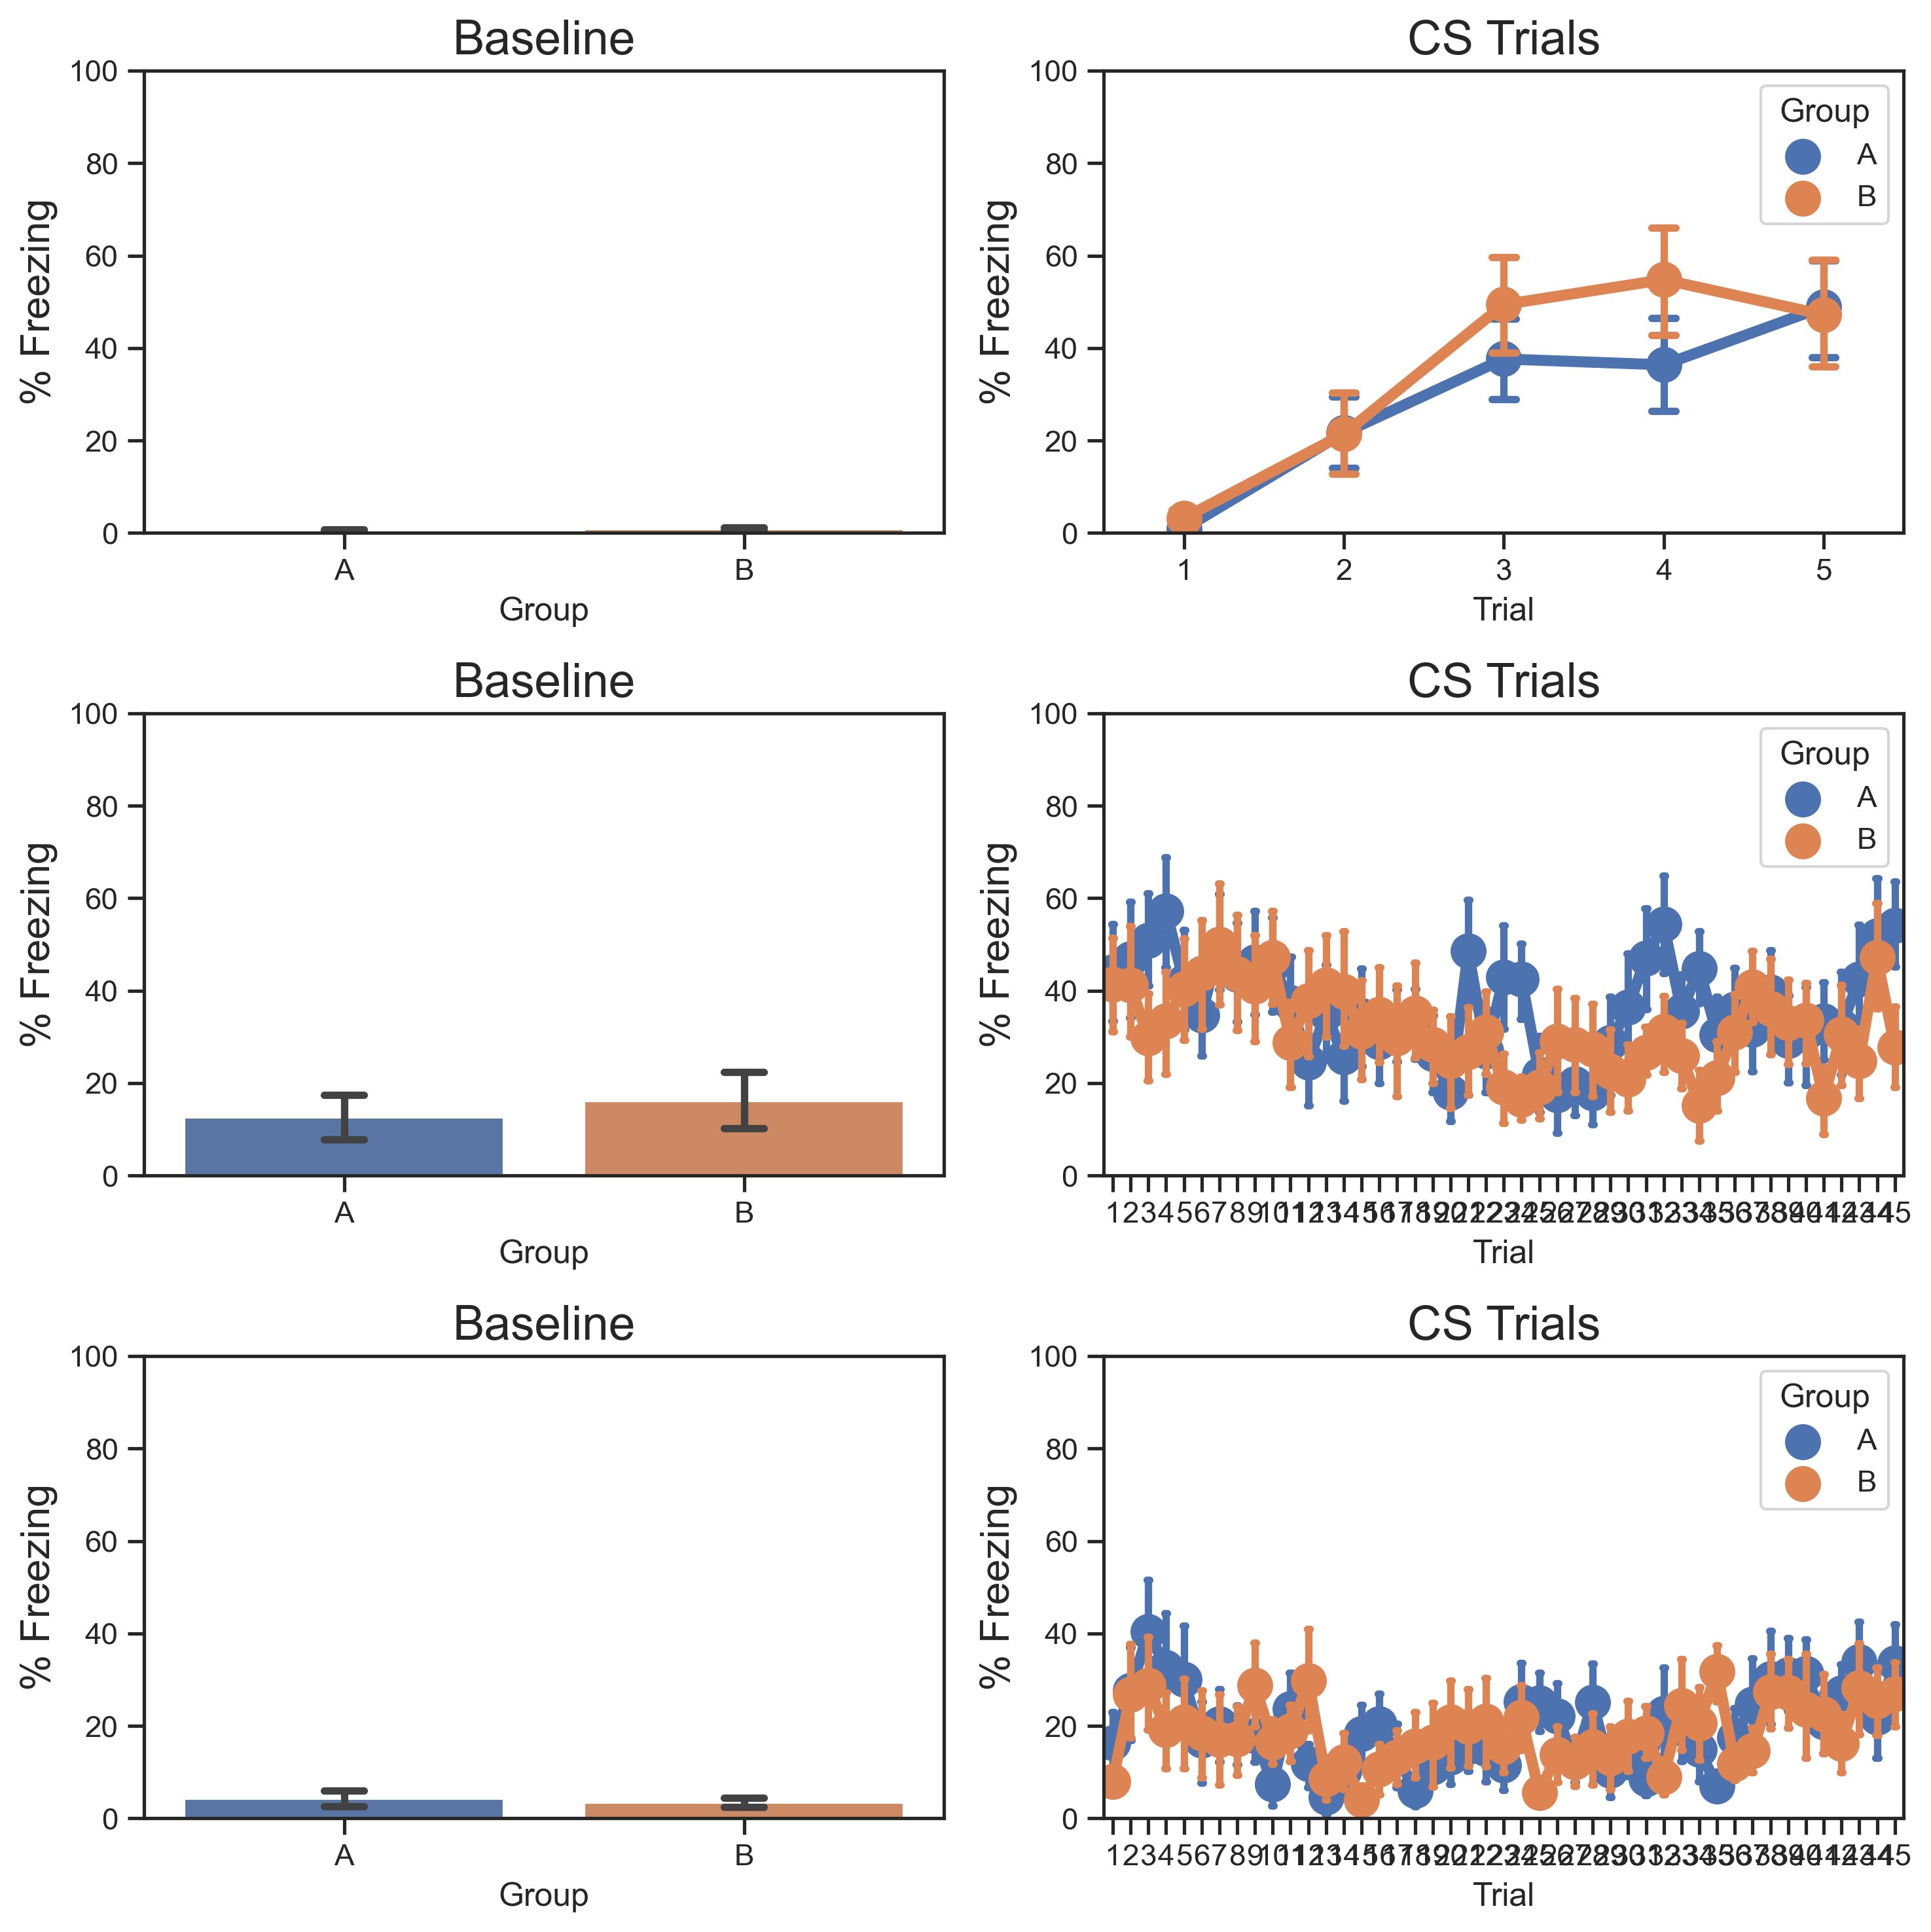

In [32]:
# fig size and resolution
plt.figure(figsize=[10, 10], dpi=300)

# make a variable containing the baseline and trial data
bl = (Cond_BL_df, Ext_BL_df, Ret_BL_df)
trials = (Cond_Trials_df, Ext_Trials_df, Ret_Trials_df)

# loop through subplots
for count, (b,t) in enumerate(zip(bl, trials)):
    
    # baseline data
    plt.subplot(3, 2, (count+1)*2-1) 
    sns.barplot(data=b, 
                x='Group', 
                y='BL', 
                ci=68, 
                capsize=.1)
    plt.ylim(0, 100)
    plt.ylabel('% Freezing', fontsize=15)
    plt.title('Baseline', fontsize=17.5)
    
    # trial data
    plt.subplot(3, 2, (count+1)*2) 
    sns.pointplot(data=t, 
                  x='Trial',
                  y='CS',
                  hue='Group',
                  scale=1.5,
                  ci=68,
                  capsize=.15)
    plt.ylim(0, 100)
    plt.ylabel('% Freezing', fontsize=15)
    plt.title('CS Trials', fontsize=17.5)
    
plt.tight_layout()

# uncomment to save figure
#plt.savefig('Example_figure.png')

## Stats using Pingouin
https://pingouin-stats.org/index.html

### Conditioning

In [43]:
import pingouin as pg

# Baseline: one-way ANOVA
aov = pg.anova(data=Cond_BL_df,
               dv='BL',
               between='Group',
               detailed=True)
pg.print_table(aov)

# Trials: two-way mixed-design ANOVA
aov = pg.mixed_anova(data=Cond_Trials_df,
                     dv='CS',
                     within='Trial',
                     between='Group',
                     subject='ID')
pg.print_table(aov)
aov


ANOVA SUMMARY

Source        SS    DF     MS        F    p-unc      np2
--------  ------  ----  -----  -------  -------  -------
Group      0.434     1  0.434    0.529    0.476    0.027
Within    15.598    19  0.821  nan      nan      nan


ANOVA SUMMARY

Source              SS    DF1    DF2        MS       F    p-unc    np2      eps
-----------  ---------  -----  -----  --------  ------  -------  -----  -------
Group          977.455      1     19   977.455   0.443    0.514  0.023  nan
Trial        32924.571      4     76  8231.143  13.329    0.000  0.412    0.821
Interaction   1570.919      4     76   392.730   0.636    0.638  0.032  nan



,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,977.454545,1,19,977.454545,0.442838,5.137538e-01,0.022776,NaN
1,Trial,32924.571429,4,76,8231.142857,13.328846,2.818815e-08,0.412290,0.820658
2,Interaction,1570.919481,4,76,392.729870,0.635955,6.384165e-01,0.032387,NaN


### Extinction

In [39]:
# Baseline: one-way ANOVA
aov = pg.anova(data=Ext_BL_df,
               dv='BL',
               between='Group',
               detailed=True)
pg.print_table(aov)

# Trials: two-way mixed-design ANOVA
aov = pg.mixed_anova(data=Ext_Trials_df,
                     dv='CS',
                     within='Trial',
                     between='Group',
                     subject='ID')
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF       MS        F    p-unc      np2
--------  --------  ----  -------  -------  -------  -------
Group       66.295     1   66.295    0.198    0.661    0.010
Within    6356.435    19  334.549  nan      nan      nan


ANOVA SUMMARY

Source              SS    DF1    DF2        MS      F    p-unc    np2      eps
-----------  ---------  -----  -----  --------  -----  -------  -----  -------
Group         6020.204      1     19  6020.204  0.464    0.504  0.024  nan
Trial        54094.205     44    836  1229.414  1.461    0.029  0.071    0.194
Interaction  33539.092     44    836   762.252  0.906    0.648  0.045  nan



### Retrieval

In [42]:
# Baseline: one-way ANOVA
aov = pg.anova(data=Ret_BL_df,
               dv='BL',
               between='Group',
               detailed=True)
pg.print_table(aov)

# Trials: two-way mixed-design ANOVA
aov = pg.mixed_anova(data=Ret_Trials_df,
                     dv='CS',
                     within='Trial',
                     between='Group',
                     subject='ID')
pg.print_table(aov)


ANOVA SUMMARY

Source         SS    DF      MS        F    p-unc      np2
--------  -------  ----  ------  -------  -------  -------
Group       4.195     1   4.195    0.168    0.687    0.009
Within    475.594    19  25.031  nan      nan      nan


ANOVA SUMMARY

Source              SS    DF1    DF2       MS      F    p-unc    np2      eps
-----------  ---------  -----  -----  -------  -----  -------  -----  -------
Group          244.946      1     19  244.946  0.035    0.854  0.002  nan
Trial        37831.848     44    836  859.815  1.776    0.002  0.085    0.207
Interaction  18367.745     44    836  417.449  0.862    0.725  0.043  nan

